#Memasukkan data

##Mount akun google drive ke google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Unzip

In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Date Palm data_split.zip", 'r') as zip_ref:
  zip_ref.extractall("./")

##Load gambarnya

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/Date Palm data_split/train',
    target_size=(200,200),
    batch_size=16
)
validation_generator = validation_datagen.flow_from_directory(
    '/content/Date Palm data_split/validation',
    target_size=(200,200),
    batch_size=16,
    shuffle=False
)
test_generator = test_datagen.flow_from_directory(
    '/content/Date Palm data_split/test',
    target_size=(200,200),
    batch_size=16,
    shuffle=False
)

Found 1841 images belonging to 3 classes.
Found 393 images belonging to 3 classes.
Found 397 images belonging to 3 classes.


#Import library

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Accuracy, Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping

#Membuat arsitektur model CNN

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 32)        0

#Compile modelnya

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[Recall(), Precision(), 'accuracy']
)

#Membuat callback

In [ ]:
model_callback = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    mode = 'min',
    patience = 3
)

#Training

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 30,
    steps_per_epoch = 50,
    callbacks = [model_callback],
    verbose = 1
)

Epoch 1/30
50/50 [==============================] - 43s 727ms/step - loss: 1.0247 - recall: 0.1197 - precision: 0.4677 - accuracy: 0.4535 - val_loss: 0.9489 - val_recall: 0.3639 - val_precision: 0.5861 - val_accuracy: 0.4580
Epoch 2/30
50/50 [==============================] - 34s 670ms/step - loss: 0.8210 - recall: 0.4306 - precision: 0.5982 - accuracy: 0.5758 - val_loss: 0.5839 - val_recall: 0.7303 - val_precision: 0.8039 - val_accuracy: 0.7761
Epoch 3/30
50/50 [==============================] - 41s 818ms/step - loss: 0.5727 - recall: 0.6913 - precision: 0.7555 - accuracy: 0.7400 - val_loss: 0.4080 - val_recall: 0.8168 - val_precision: 0.8316 - val_accuracy: 0.8295
Epoch 4/30
50/50 [==============================] - 35s 705ms/step - loss: 0.4308 - recall: 0.7850 - precision: 0.8051 - accuracy: 0.7987 - val_loss: 0.3559 - val_recall: 0.8550 - val_precision: 0.8819 - val_accuracy: 0.8677
Epoch 5/30
50/50 [==============================] - 32s 637ms/step - loss: 0.3254 - recall: 0.8866 -

#Testing

In [ ]:
model.evaluate(test_generator)

25/25 [==============================] - 4s 156ms/step - loss: 0.1481 - recall: 0.9521 - precision: 0.9545 - accuracy: 0.9521


[0.14809869229793549,
 0.9521410465240479,
 0.9545454382896423,
 0.9521410465240479]

#Visualisasi nilai loss saat training

<function matplotlib.pyplot.show(close=None, block=None)>

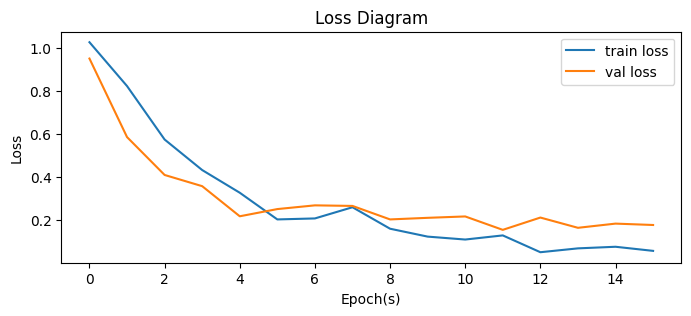

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.show

#Save modelnya

In [ ]:
model.save('model.h5')